In [1]:
DATA_PATH = "./data/"
OUTPUT_PATH = "./out/"

In [2]:
%matplotlib inline

import os
import ast
import math
import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import axes3d

colorDic = {"blue" : "#6599FF", "yellow" : "#FFAD33",  "purple": "#683b96", "green" : "#198D6D", "red" : "#FF523F"}
colors = list(colorDic.values())

In [3]:
lst = []
for filename in os.listdir(DATA_PATH):
    if filename.endswith(".csv") and not(filename.endswith("_conditions.csv")) and filename.startswith("S"): 
        #print(filename)
        i = filename.split("_")[1].split(".")[0]
        split = filename.split("bone")[0].split("click")[0].split("raw")[0]
        x = split.split("S")[1].split("U")
        x.append(i)
        lst.append(x)
    else:
        continue
dfData = pd.DataFrame(lst, columns=["S", "U", "I"]).drop_duplicates()
for c in dfData.columns:
    dfData[c] = pd.to_numeric(dfData[c])
dfData.sort_values(["S", "U"], ascending=False)

,S,U,I
7,15,28,0
8,15,27,0
17,14,26,0
2,14,25,0
13,13,24,0
1,13,23,0
19,12,22,0
12,12,21,0
10,11,20,0
4,11,19,0


In [4]:
def readBoneData (pS, pId, i):
    file = "%sS%iU%iboneData_%i.csv" % (DATA_PATH, pS, pId, i)
    print(file)
    with open(file, 'r') as f:
        first_line = f.readline()
    startTime = (int)(first_line.split(" ")[-1].replace("\n", ""))
    print("Start Time: %i" %startTime)
    df = pd.read_csv(file, skiprows=1, sep=";")
    df.rename(columns={'PlayerSelect': 'IsPointer', 'UId': 'PId'}, inplace=True)
    x = len(df)
    if df.PId.dtype is np.array([object()]).dtype:
        df = df[(df.PId != "PId") & ( df.PId != "UId")]
        if (len(df) != x):
            print("Dropped %i header lines in file" % (x-len(df)))
    df = df[df['Timestamp'].isna() == False]
    for c in df.columns[:2]:
        df[c] = pd.to_numeric(df[c])
    #df.IsPointer = df.IsPointer.iloc[0] == 'True'
    if ((file == "%sS2U4boneData_0.csv" % DATA_PATH) | (file == "%sS4U6boneData_0.csv" % DATA_PATH)):
        df['IsPointer'] = False
    if (file == ".%sS4U5boneData_0.csv" % DATA_PATH):
        df['IsPointer'] = True
    for c in df.columns[3:]:
        if (isinstance(df[c].iloc[0], str)):
            df[c] = df[c].apply(lambda x: ast.literal_eval(x))
    df["StartTimeUnix"] = startTime
    df.columns = df.columns.str.replace("_", "")
    df.rename(columns={'Timestamp': 'TimeUnix'}, inplace=True)
    df["Time"] = pd.to_datetime(df.TimeUnix, unit='ms')
    
    df["SessionId"] = pS
    df["File"] = file
    print("Length: %i" % len(df))
    return df

In [5]:
%%time
file = "%sdata_bone_v01.pkl" % OUTPUT_PATH
if os.path.isfile(file):
    print("Reading Existing bone file")
    dfBone = pd.read_pickle(file)
else: 
    dfsBones = dfData.apply(lambda e: readBoneData(e.S, e.U, e.I), axis=1)
    dfBone = pd.concat(dfsBones.to_list(), sort=True)
    dfBone = dfBone.reset_index(drop= True)
    d = {'True': True, 'False': False}
    dfBone["IsPointer"]= dfBone.IsPointer.astype(str).map(d)
    dfBone.to_pickle(file)

Reading Existing bone file
CPU times: user 13.9 s, sys: 6.22 s, total: 20.1 s
Wall time: 20.4 s


In [6]:
dfBone.groupby(["PId", "IsPointer"]).count()

,,File,FingertipForward,FingertipPos,FingertipRot,HMDForward,HMDPos,HMDRot,IntersectionEFRC,IntersectionFRC,IntersectionHRC,IntersectionIFRC,IntersectionStick,PointerstickForward,PointerstickPos,PointerstickRot,PosCylinderObserver,SessionId,StartTimeUnix,Time,TimeUnix
PId,IsPointer,,,,,,,,,,,,,,,,,,,,
1,True,199933,199933,199933,199933,199933,199933,199933,199933,199933,199933,199933,0,0,0,0,0,199933,199933,199933,199933
2,False,106046,0,0,0,106046,106046,106046,0,0,0,0,106046,106046,106046,106046,106046,106046,106046,106046,106046
3,True,226926,226926,226926,226926,226926,226926,226926,226926,226926,226926,226926,0,0,0,0,0,226926,226926,226926,226926
4,False,117489,0,0,0,117489,117489,117489,0,0,0,0,117489,117489,117489,117489,117489,117489,117489,117489,117489
5,True,371185,371185,371185,371185,371185,371185,371185,371185,371185,371185,371185,0,0,0,0,0,371185,371185,371185,371185
6,False,202273,0,0,0,202273,202273,202273,0,0,0,0,202273,202273,202273,202273,202273,202273,202273,202273,202273
7,True,249719,249719,249719,249719,249719,249719,249719,249719,249719,249719,249719,0,0,0,0,0,249719,249719,249719,249719
8,False,141314,0,0,0,141314,141314,141314,0,0,0,0,141314,141314,141314,141314,141314,141314,141314,141314,141314
9,True,313322,313322,313322,313322,313322,313322,313322,313322,313322,313322,313322,0,0,0,0,0,313322,313322,313322,313322


In [7]:
def readConditionData(pS):
    file = "%sS%i_conditions.csv" % (DATA_PATH, pS)
    print(file)
    df = pd.read_csv(file, skiprows=3, sep=";")
    df["ObserverDistance"] = -1
    
    if (len(df.PositonOfObserver.unique()) != 3):
        print("")
        print("Error: Worng amount of Distances")
        
    for i, e in enumerate(sorted(df.PositonOfObserver.unique())):
        df.loc[df.PositonOfObserver == e, "ObserverDistance"] = i
    return df

def readClickData (pS, pId, i):
    global dfBone
    file = "%sS%iU%iclickData_%i.csv" % (DATA_PATH, pS, pId, i)
    print(file)
    with open(file, 'r') as f:
        first_line = f.readline()
    startTime = (int)(first_line.split(" ")[-1].replace("\n", ""))
    print("Start Time: %i" %startTime)
    df = pd.read_csv(file, skiprows=1, sep=";")
    for c in df.columns[3:]:
        if (isinstance(df[c].iloc[0], str)):
            df[c] = df[c].apply(lambda x: ast.literal_eval(x))
    df["StartTimeUnix"] = startTime
    df.rename(columns={'Timestamp': 'TimeUnix', 'Id': 'PId', 'PlayerSelect': 'IsPointer'}, inplace=True)
    
    df["Time"] = pd.to_datetime(df.TimeUnix, unit='ms')
    df["SessionId"] = pS
    df["File"] = file
    
    df2 = readConditionData(pS)
    df["ObserverDistance"] = df2.ObserverDistance
    return df

In [8]:
dfs = []
for i, e in dfData.sort_values(["S", "U"], ascending=False).iterrows():
    dfClickData = readClickData(e.S, e.U, e.I)
    dfs.append(dfClickData)
dfClick = pd.concat(dfs)

dfClick["TargetId"] = -1
i = 0
for e in sorted(dfClick.TargetPos.unique()):
    if (len(dfClick[dfClick.TargetPos == e] != 0)):
        dfClick.loc[dfClick.TargetPos == e, "TargetId"] = i
        i = i+1

if len(dfClick.TargetId.unique()) != 80:
    print("")
    print("Error: to Many Targets")
    
dfClick = dfClick.reset_index(drop= True)
    
dfClick["TargetAngle"] = dfClick.TargetPos.apply(lambda x: math.degrees(math.atan2(x[0],x[2])))
dfClick["TargetProjectionX"]  = (dfClick.TargetAngle / 180.0) * np.pi * 4.0
dfClick["TargetProjectionY"]  = dfClick.TargetPos.apply(lambda x: x[1])

./data/S15U28clickData_0.csv
Start Time: 1519995050823
./data/S15_conditions.csv
./data/S15U27clickData_0.csv
Start Time: 1519995050630
./data/S15_conditions.csv
./data/S14U26clickData_0.csv
Start Time: 1519990106908
./data/S14_conditions.csv
./data/S14U25clickData_0.csv
Start Time: 1519990106631
./data/S14_conditions.csv
./data/S13U24clickData_0.csv
Start Time: 1519915668459
./data/S13_conditions.csv
./data/S13U23clickData_0.csv
Start Time: 1519915668255
./data/S13_conditions.csv
./data/S12U22clickData_0.csv
Start Time: 1519909893137
./data/S12_conditions.csv
./data/S12U21clickData_0.csv
Start Time: 1519909892938
./data/S12_conditions.csv
./data/S11U20clickData_0.csv
Start Time: 1519895576181
./data/S11_conditions.csv
./data/S11U19clickData_0.csv
Start Time: 1519895576405
./data/S11_conditions.csv
./data/S10U18clickData_0.csv
Start Time: 1519832666104
./data/S10_conditions.csv
./data/S10U17clickData_0.csv
Start Time: 1519832665900
./data/S10_conditions.csv
./data/S9U16clickData_0.csv


In [9]:
dfClick.to_pickle(OUTPUT_PATH + "data_click_v01.pkl")

# Random Visualisations

In [15]:
dfs = []
for s in dfClick.SessionId.unique():
    dfC = dfClick[(dfClick.IsPointer == False) & (dfClick.SessionId == s)]
    
    dfBonePointer = dfBone[(dfBone.IsPointer == True) & (dfBone.SessionId == s)].sort_values("Time")
    dfBoneObserver = dfBone[(dfBone.IsPointer == False) & (dfBone.SessionId == s)].sort_values("Time")
    
    for i, dfB in enumerate([dfBonePointer, dfBoneObserver]):
        dfMatch = pd.merge_asof(dfC, dfB, on="Time")
        dfMatch.rename(columns={'PId_x': 'PId', 'TimeUnix_x': 'TimeUnixClick', 'TimeUnix_y': 'TimeUnixBone',
                                'StartTimeUnix_x': 'StartTimeUnixClick', 'StartTimeUnix_y': 'StartTimeUnixBone',
                                'IsPointer_y': 'IsPointer', 'SessionId_x': 'SessionId',
                               'File_x': 'FileClick', 'File_y': 'FileBone'}, inplace=True)
        del dfMatch["PId_y"]
        del dfMatch["IsPointer_x"]    
        del dfMatch["SessionId_y"]
        dfs.append(dfMatch)
        #if (i == 0):
        #    dfsPointer.append(dfMatch)
        #elif (i == 1):
        #    dfsObserver.append(dfMatch)

dfMatch = pd.concat(dfs)

In [16]:
dfClick.groupby(["PId", "IsPointer"]).TimeUnix.min()-dfBone.groupby(["PId", "IsPointer"]).TimeUnix.min()

PId  IsPointer
1    True         220629
2    False        239684
3    True          19909
4    False        160059
5    True          26069
6    False         40147
7    True          89327
8    False         93342
9    True          91125
10   False        115743
11   True         287794
12   False        307729
13   True          14998
14   False         25808
15   True         159398
16   False        216725
17   True         115836
18   False        120288
19   True          53234
20   False         59181
21   True         198000
22   False        217353
23   True          63557
24   False        110519
25   True          67897
26   False         86145
27   True          68647
28   False         85027
Name: TimeUnix, dtype: int64

In [18]:
raycasts = ["IFRC", "FRC","HRC", "EFRC"]
dfPointer = dfMatch[dfMatch.IsPointer == True].copy(deep=True)
for rc in raycasts:
    dfPointer[rc+"Angle"] = dfPointer["Intersection"+ rc].apply(lambda x: math.degrees(math.atan2(x[0],x[2])))
    dfPointer[rc+"X"]  = (dfPointer[rc + "Angle"] / 180.0) * np.pi * 4.0
    dfPointer[rc+"Y"]  = dfPointer["Intersection"+ rc].apply(lambda x: x[1])
    dfPointer[rc+"XCorected"] = dfPointer[["TargetProjectionX", rc+"X"]].apply(lambda x:  x[rc+"X"] - 4*np.pi*2 if x[rc+"X"] - x.TargetProjectionX > 4*np.pi else x[rc+"X"] ,axis=1)



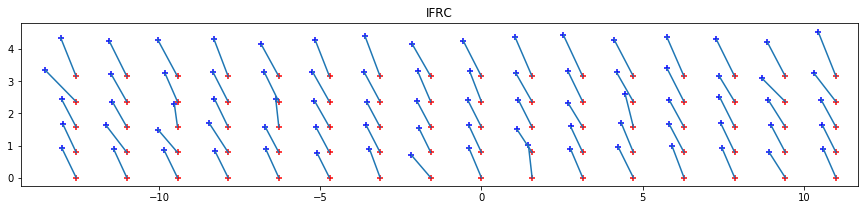

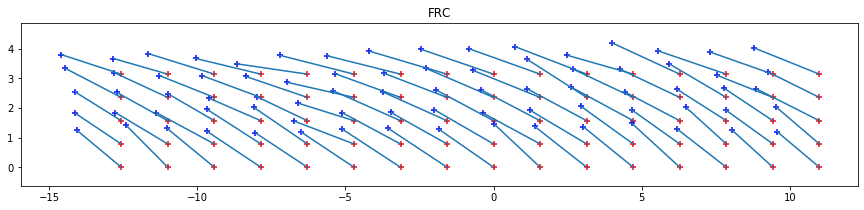

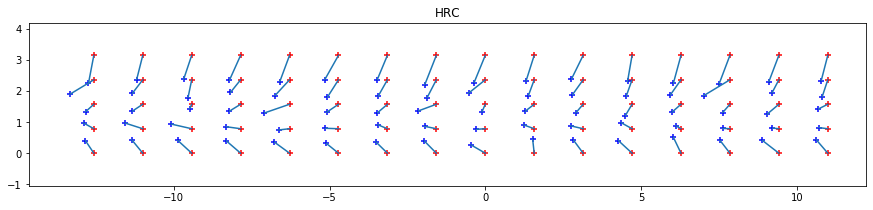

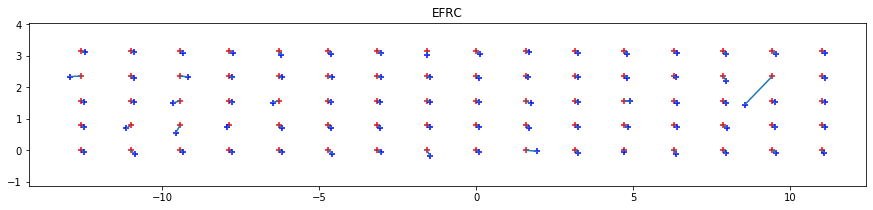

In [21]:
# NOT FILTRED
dfAgg = dfPointer.groupby(["TargetId"]).mean()
dfAgg = dfAgg.reset_index()

   
for rc in raycasts:
    plt.figure(figsize=(15,3))
    plt.title(rc)
    plt.scatter(dfAgg.TargetProjectionX, dfAgg.TargetProjectionY, marker="+", color="r")
    plt.scatter(dfAgg[rc+"XCorected"], dfAgg[rc+"Y"], marker="+", color="b")
    ax = plt.gca()
    for i, e in dfAgg.iterrows():
        l = mlines.Line2D([e.TargetProjectionX, e[rc+"XCorected"]], [e.TargetProjectionY, e[rc+"Y"]])
        ax.add_line(l)

    plt.axis('equal')
    plt.show()

In [23]:
dfObserver = dfMatch[dfMatch.IsPointer == False].copy(deep=True)
dfObserver["StickAngle"] = dfObserver.IntersectionStick.apply(lambda x: math.degrees(math.atan2(x[0],x[2])))
dfObserver["StickX"]  = (dfObserver.StickAngle / 180.0) * np.pi * 4.0
dfObserver["StickY"]  = dfObserver.IntersectionStick.apply(lambda x: x[1])
dfObserver['StickXCorected'] =dfObserver[["TargetProjectionX", "StickX"]].apply(lambda x:  x.StickX - 4*np.pi*2 if x.StickX - x.TargetProjectionX > 4*np.pi else x.StickX ,axis=1)

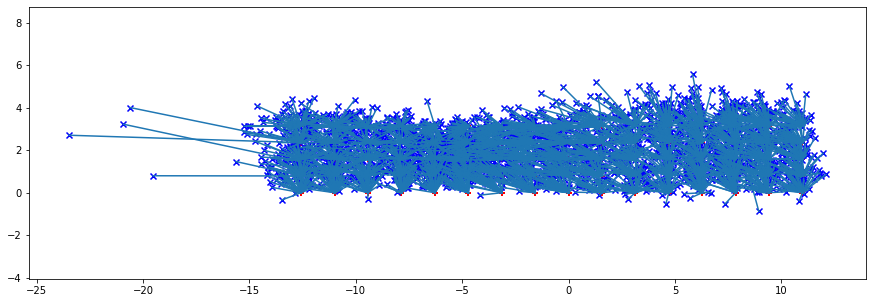

In [25]:
plt.figure(figsize=(15,5))
plt.scatter(dfObserver.TargetProjectionX, dfObserver.TargetProjectionY, marker="+", color="r")
plt.scatter(dfObserver.StickXCorected, dfObserver.StickY, marker="x", color="b")

ax = plt.gca()
for i, e in dfObserver.iterrows():
    l = mlines.Line2D([e.TargetProjectionX, e.StickXCorected], [e.TargetProjectionY, e.StickY])
    ax.add_line(l)
    
plt.axis('equal')
plt.show()

In [26]:
dfObserver["ErrorDistance"] = np.sqrt(np.power(dfObserver.StickXCorected - dfObserver.TargetProjectionX, 2) + np.power(dfObserver.StickY - dfObserver.TargetProjectionY, 2))

In [27]:
des = dfObserver["ErrorDistance"].describe()
des

count    3360.000000
mean        1.049448
std         0.895418
min         0.018607
25%         0.601366
50%         0.902406
75%         1.345887
max        23.555519
Name: ErrorDistance, dtype: float64

In [28]:
dfObserverFilter = dfObserver[dfObserver.ErrorDistance < des["mean"] + 3*des["std"]]
print("Filterd: %.2f"%(100-(len(dfObserverFilter) / len(dfObserver))*100))

Filterd: 0.48


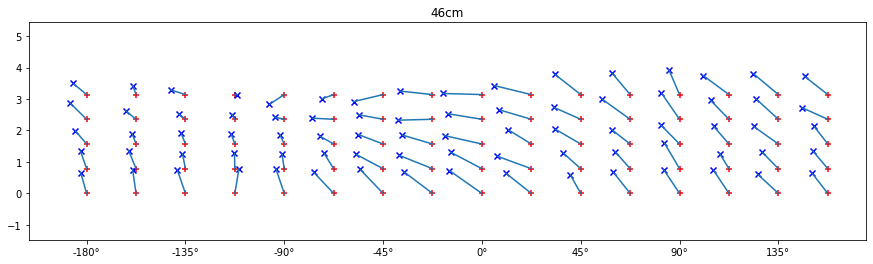

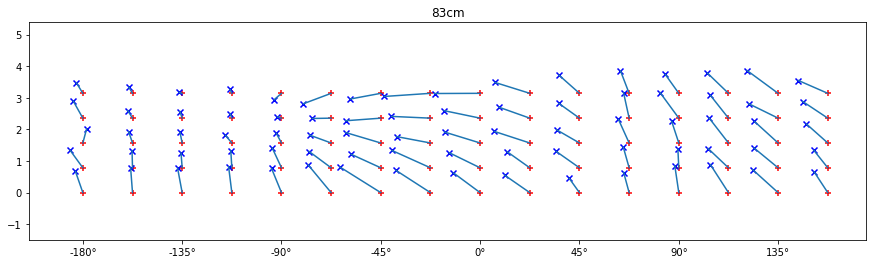

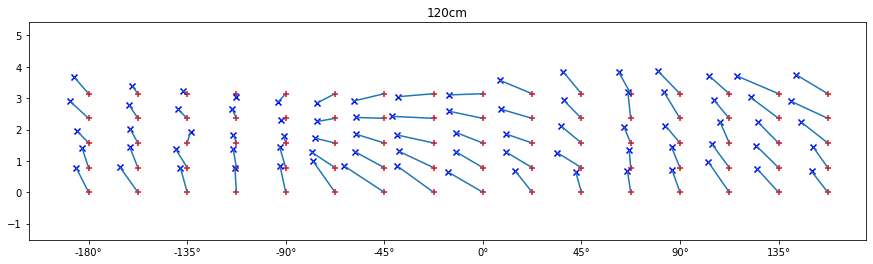

In [29]:
# Not Filtred
dfAgg = dfObserverFilter.groupby(["ObserverDistance", "TargetId"])[["StickXCorected", "StickY", "TargetProjectionX", "TargetProjectionY"]].mean()
dfAgg = dfAgg.reset_index()
for dis in sorted(dfAgg.ObserverDistance.unique()):
    df = dfAgg[dfAgg.ObserverDistance == dis]
    plt.figure(figsize=(15,4))
    if (dis == 0):
        plt.title("46cm")
    elif (dis == 1):
        plt.title("83cm")
    elif (dis == 2):
        plt.title("120cm")
    plt.scatter(df.TargetProjectionX, df.TargetProjectionY, marker="+", color="r")
    plt.scatter(df.StickXCorected, df.StickY, marker="x", color="b")

    #av = dfMatch[['TargetProjectionX', 'StickX', 'TargetProjectionY', 'StickY']].values
    ax = plt.gca()
    for i, e in df.iterrows():
        l = mlines.Line2D([e.TargetProjectionX, e.StickXCorected], [e.TargetProjectionY, e.StickY])
        ax.add_line(l)
        
    lstTicks = []
    for x in np.arange(-180,181,45):
        lstTicks.append(str(x)+"°")
    plt.xticks((4*np.pi*2)/360 * np.arange(-180,181,45), lstTicks)

    plt.axis('equal')
    plt.show()

In [30]:
df2 = dfObserverFilter.copy()

In [31]:
x = np.array(list(dfObserverFilter.TargetPos.apply(lambda x: list(x)).values))
df2["TargetPosX"] = x[:,0]
df2["TargetPosY"] = x[:,1]
df2["TargetPosZ"] = x[:,2]

In [32]:
x = np.array(list(dfObserverFilter.IntersectionStick.apply(lambda x: list(x)).values))
df2["IntersectionStickX"] = x[:,0]
df2["IntersectionStickY"] = x[:,1]
df2["IntersectionStickZ"] = x[:,2]

In [33]:
lst = []
lst.append((0.46,0,0))
lst.append((0.83,0,0))
lst.append((1.2,0,0))
lst = np.array(lst)

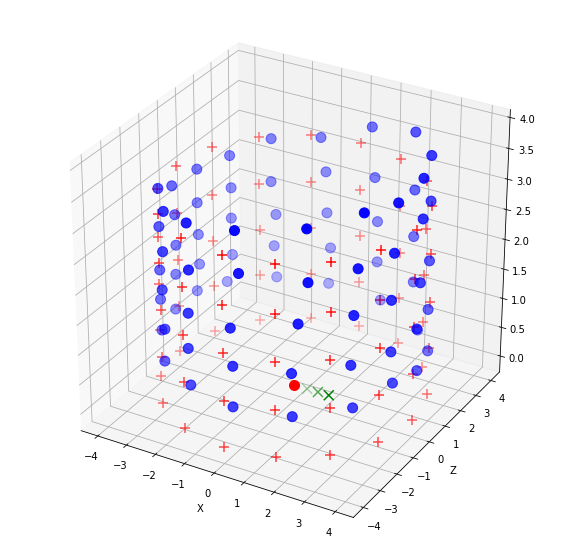

In [36]:
dfAgg = df2.groupby(["TargetId"])[["TargetPosX", "TargetPosY", "TargetPosZ", "IntersectionStickX", "IntersectionStickY", "IntersectionStickZ"]].mean()
dfAgg = dfAgg.reset_index()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfAgg.TargetPosX, dfAgg.TargetPosZ, dfAgg.TargetPosY, marker="+", color="r", s=100)
ax.scatter(dfAgg.IntersectionStickX, dfAgg.IntersectionStickZ, dfAgg.IntersectionStickY,   marker="o", color="b", s=100)

ax.scatter(0,0,0,   marker="o", color="r", s=100)
ax.scatter(lst[:,0], lst[:,1], lst[:,2],   marker="x", color="g", s=100)
#ax.view_init(25, -45)
plt.xlabel("X")
#plt.zlabel("Z")
plt.ylabel("Z")
plt.show()